In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

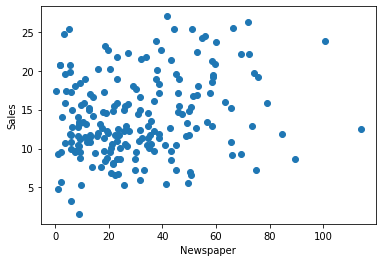

In [5]:
plt.scatter(data.Newspaper, data.Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

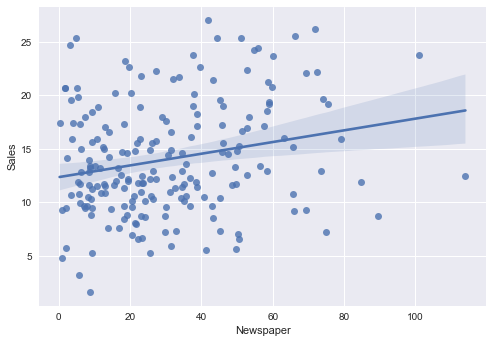

In [6]:
plt.style.use('seaborn')
sns.regplot(x = data.Newspaper, y = data.Sales)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

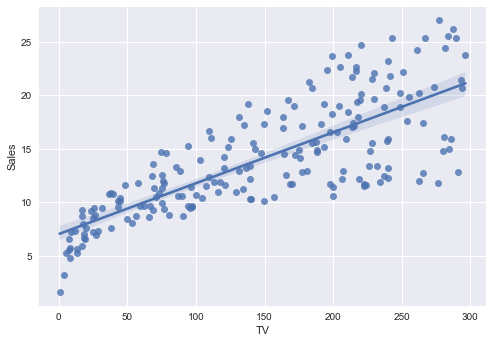

In [7]:
plt.style.use('seaborn')
sns.regplot(x = data.TV, y = data.Sales)

In [8]:
x = data.iloc[:, :3]
y = data.iloc[:, 3]

In [9]:
# segregating the training data from the test data
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [10]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [11]:
# Applying the linear regression model

#step - 1:Import the model from sklearn package.
from sklearn.linear_model import LinearRegression

#step - 2:Instantiate the Ml model.
reg = LinearRegression()

#step -3 : Fit the training data to the model.
reg.fit(x_train, y_train) # actual optimization happen  i e optimium theta value was oobtained.

LinearRegression()

In [12]:
print(reg.coef_)
print(reg.intercept_)

[ 0.04594865  0.18664092 -0.0024793 ]
2.9964507422644964


In [13]:
# step- 4 : predicting the model 
y_pred = reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(40,)
[16.57580056 19.68167705  5.33574281  8.78124436 13.17489662 20.62448376
  9.73228341 16.83561181 15.61668046 12.79700562 23.20673347  4.50734239
  9.7753499  17.70327775  9.7554166  18.02217724  7.05617445  7.6063785
  6.12458167 14.2246783  20.45269322 15.24467363  8.45384582 13.42106518
 16.87783401 11.73365288  8.21927141 20.81850345 12.23462461 14.17804966
  7.86782309 12.84925423 17.84662879 10.4897291   8.16287555 12.39629649
 13.81732274 14.33827931 23.4226203  18.1606802 ]


In [14]:
score = r2_score(y_test, y_pred)
print(score)

0.9075098723311352


In [15]:
x_train.shape

(160, 3)

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def polyRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

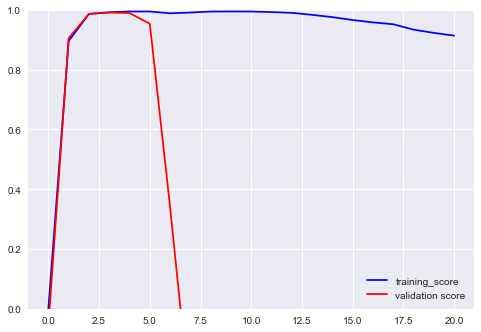

In [17]:
# validation curve is used to find the degree to be applied on the polynomial regression.
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(polyRegression(degree), x, y,
                                         param_name = 'polynomialfeatures__degree', param_range = degree, cv = 7)
plt.plot(degree, np.median(train_score, 1), color = 'blue', label ='training_score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label ='validation score')
plt.ylim(0, 1)
plt.legend(loc = 'best')

In [18]:
# from above curve degree 2 fits well.
poly_model = polyRegression(degree = 2)

In [19]:
y_pred = poly_model.fit(x_train, y_train).predict(x_test)

In [20]:
poly_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [21]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9859074089502566